In [1]:
import pandas as pd
import numpy as np
url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(url, 
                 index_col=0, 
                 parse_dates=True, 
                 dayfirst=True,
                 sep=';', 
                 header=None, 
                 skiprows=4, 
                 names=cols)
print(np.round(es.head()))

             SX5P   SX5E  SXXP  SXXE  SXXF  SXXA   DK5F  DKXF
1986-12-31  775.0  901.0  83.0  99.0  98.0  69.0  645.0  66.0
1987-01-01  775.0  901.0  83.0  99.0  98.0  69.0  645.0  66.0
1987-01-02  771.0  892.0  83.0  98.0  97.0  69.0  648.0  66.0
1987-01-05  772.0  898.0  83.0  99.0  98.0  69.0  650.0  66.0
1987-01-06  776.0  902.0  83.0  99.0  99.0  70.0  652.0  66.0


In [2]:
import pandas as pd
import numpy as np
url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
cols = ['V2TX', 'V6I1', 'V6I2', 'V6I3', 'V6I4', 'V6I5', 'V6I6', 'V6I7', 'V6I8']
vs = pd.read_csv(url, 
                 index_col=0, 
                 parse_dates=True, 
                 dayfirst=True,
                 #sep=';', 
                 header=None, 
                 skiprows=3, 
                 names=cols)
print(np.round(vs.head()))

            V2TX  V6I1  V6I2  V6I3  V6I4  V6I5  V6I6  V6I7  V6I8
1999-01-04  18.0  21.0  18.0  31.0  33.0  34.0  33.0  32.0  24.0
1999-01-05  30.0  37.0  28.0  33.0  34.0  33.0  33.0  32.0  25.0
1999-01-06  25.0  25.0  25.0  32.0  33.0  32.0  33.0  33.0  26.0
1999-01-07  33.0  35.0  32.0  36.0  35.0  33.0  33.0  34.0  26.0
1999-01-08  33.0  36.0  33.0  36.0  36.0  33.0  33.0  34.0  26.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f873a3714a8>,
      dtype=object)

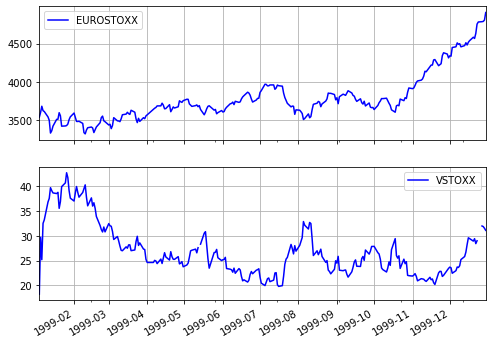

In [3]:
%matplotlib inline
import datetime as dt
start_day = dt.datetime(1999, 1, 1)
end_day = dt.datetime(2000, 1, 1)
df1 = pd.DataFrame({'EUROSTOXX': es.loc[start_day: end_day, 'SX5E']})
df2 = pd.DataFrame({'VSTOXX': vs.loc[start_day: end_day, 'V2TX']})
data = df1.join(df2)
#data.fillna(method='ffill', inplace=True)
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8740425898>,
      dtype=object)

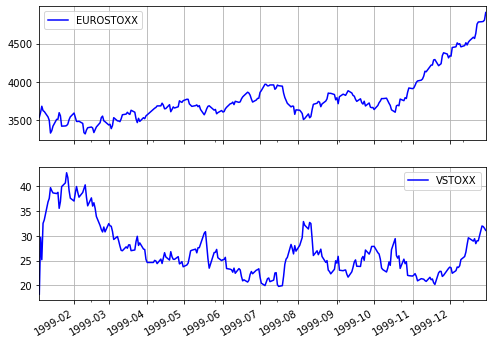

In [4]:
%matplotlib inline
import datetime as dt
start_day = dt.datetime(1999, 1, 1)
end_day = dt.datetime(2000, 1, 1)
df1 = pd.DataFrame({'EUROSTOXX': es.loc[start_day: end_day, 'SX5E']})
df2 = pd.DataFrame({'VSTOXX': vs.loc[start_day: end_day, 'V2TX']})
data = df1.join(df2)
data.fillna(method='ffill', inplace=True)
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

            EUROSTOXX    VSTOXX
1999-01-04        NaN       NaN
1999-01-05   0.017228  0.489248
1999-01-06   0.022138 -0.165317
1999-01-07  -0.015723  0.256337
1999-01-08  -0.003120  0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f873a3ef358>,
      dtype=object)

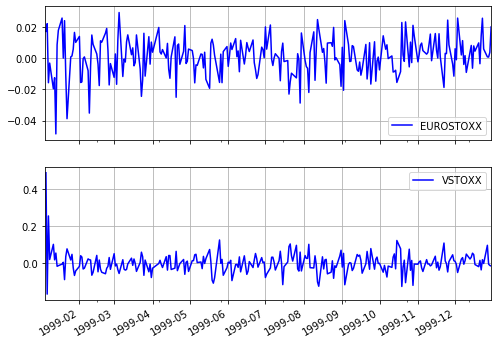

In [5]:
df = np.log(data / data.shift(1))
print(df.head())
df.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

(255, 1)
(255, 1)


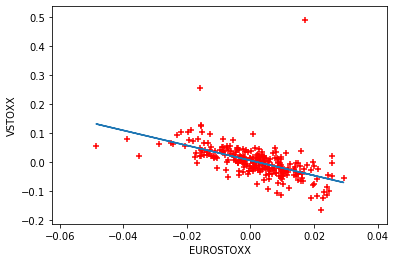

In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model

x = df['EUROSTOXX'].iloc[1:].values.reshape((-1, 1))  # (255, 1)
y = df['VSTOXX'].iloc[1:].values.reshape((-1, 1))  # (255, 1)
print(x.shape)
print(y.shape)

reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)

plt.xlabel('EUROSTOXX')
plt.ylabel('VSTOXX')
plt.scatter(x, y, color='red', marker='+')
plt.plot(x, y_pred)
plt.show()